In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as tri
import math
import numpy.random as rd

$$\newcommand{\nr}[1]{\|#1\|}
\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\N}{\mathbb{N}}
$$
### Cours accéléré analyse numérique - M2 AMS 2023/24

# Méthode des éléments finis en 2D.

# I - Conditions aux limites de Neumann homogènes

On s'intéresse ici à la résolution approchée du problème aux limites suivant, avec conditions aux limites de Neumann homogène :

$$
(PN)\left\{\begin{aligned}
&-\Delta u+u=f,\ \textrm{dans }\Omega,\\
&\frac{\partial u}{\partial n}=0, \textrm{dans }\partial\Omega,
\end{aligned}
\right.
$$

où $f:\overline{\Omega}\longrightarrow\mathbb{R}$ est une fonction de classe $\mathcal{C}^2$ donnée et où $\Omega$ est un ouvert de $\mathbb{R}^2$ donné, de frontière $\partial\Omega$ *régulière*. 

**Question 1.** Écrire la formulation variationnelle du problème $(P)$ sous la forme 
\begin{equation*}
(PNv)\ \ \ 
\begin{cases}
u\in V  \,\textrm{tel que}\\
a(u,v)=L(v),\ \,\forall\ v\in V ,
\end{cases}
\end{equation*}
où $V=H^1(\Omega)$, $a$ est une forme bilinéaire dans $V$  et $L$ une forme linéaire de $V,$ que l'on explicitera. 

On suppose désormais que le domaine $\Omega$ est polygonale et on considère une triangulation $T_h$ de $\Omega$, autrement dit un pavage de $\Omega$ par des triangles tel que l'intersection de chaque deux triangles est soit vide, soit une arête complète des 2 triangles, soit un sommet des deux triangles. L'indice $h$ note le diamètre maximal des triangles de $T_h$.

On considère l'espace $V_h$ corespondant à l'approximation de $H^1(\Omega)$ par des éléments finis $P^1$ associés à la triangulation $T_h$ :


$$
V_h=\{\Phi\in C^0(\overline{\Omega})\,|\,\Phi_{|T}\in\mathbb{P}^1,\ \textrm{pour tout } T\in T_h\}.
$$

On note $\{T_N\}_{N=1,\dots,N_{tri}}\ \ \ $ les triangles de $T_h,$ $\{S_I\}_{I=1,\dots,N_{Som}}\  \ \ $ les sommets des triangles la triangulation et $\{\Phi_I\}_{I=1,\dots,N_{Som}}\ \ \ $ les fonctions de $V_h$ définies par 

$$
\Phi_I(S_J)=\delta_{IJ},\ I,J=1,\dots,N_{Som}.
$$ 

Les fonctions $\Phi_I$ sont l'analogue en dimension 2 des fonctions chapeaux que l'on a vu en dimension 1.

On a que $\{\Phi_1,\dots,\Phi_{N_{Som}}\ \}$ est une base de $V_h$ et $V_h$ est donc un sous-espace de $H^1(\Omega)$ de dimension finie $N_{Som}$. 

Le problème discret consiste alors à chercher $u_h\in V_h$ tel que 
$$
(PNv_h)\ \ \ \ \ \ \ \ \ a(u_h,\Phi_I)=L(\Phi_I),\ \,\forall\ I=1,\dots,N_{Som}. 
$$

**Question 2.** Soit $u_h=\displaystyle{\sum_{I=1}^{{NSom}}u_I\Phi_I}.$ Montrer que $u_h$ est solution de $(PNv_h)$ si et seulement si le vecteur $U=(u_1,\dots,u_{NSom})^T$ est solution d'un système linéaire 

$$
KU+MU=F,
$$

où $K$ et $M$ sont les matrices de $\mathcal{M}^{N_{Som}\times N_{Som}}\ \ \ (\mathbb{R})$ définies par

$$
K_{I,J}=\int_{\Omega}\nabla\Phi_J\cdot\nabla\Phi_I,\ \ \ M_{I,J}=\int_{\Omega}\Phi_J\Phi_I,
$$ 

et où $F$ est le vecteur de $\mathbb{R}^{NSom}$ défini par 

$$
F_I=\int_{\Omega}f\Phi_I.
$$ 


**Maillage de $\Omega.$**

Dans un premier temps on considère $\Omega$ le carré $[0,2]\times[0,2].$ 

Pour se répérer dans le maillage du domaine $\Omega$, les triangles et les sommets des triangles sont numérotés respectivement de $1$ à $N_{Tri}$ et de 1 à $N_{Som}$.

La triangulation $T_h$ de $\Omega$ est alors représentée par deux matrices. La première, que l'on appellera dans le programme python $TabTri,$ contient la liste des triangles. Il s'agit d'une matrice de taille $N_{Tri}\times3$ que, dans chaque ligne $N$, contient les 3 indices $I$ des sommets du triangle $T_N.$ La deuxième, que l'on appellera $TabSom,$ contient les coordonnées de chaque sommet de la triangulation. C'est une matrice de taille $N_{Som}\times2$ que, dans chaque ligne $I$ contient les coordonnées du sommet $S_I.$ 
Le code suivant crée le maillage et ces matrices.


Text(0.5, 1.0, 'maillage')

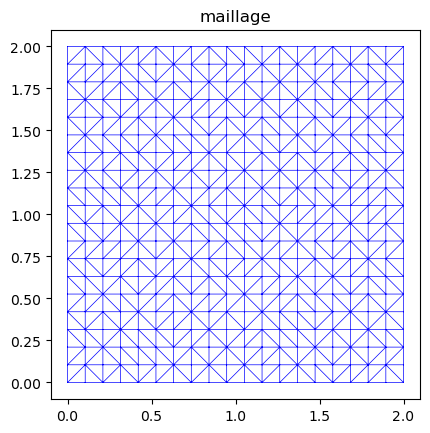

In [6]:



Nx=18
Ny=18
# On peut choisir Nx différent de Ny

x_m=0.
x_M=2.
y_m=0.
y_M=2.

x=np.linspace(x_m,x_M,Nx+2)
y=np.linspace(y_m,y_M,Ny+2)

X,Y=np.meshgrid(x,y)

X=X.flatten()
Y=Y.flatten()

triang = tri.Triangulation(X, Y)

NTri=np.shape(triang.triangles)[0]
NSom=np.shape(triang.x)[0]

#Tableau avec coordonnes des noeuds
TabSom=np.zeros([NSom,2])
TabSom[:,0]=triang.x
TabSom[:,1]=triang.y

#Tableau avec référence des noeuds
RefSom=np.zeros([NSom,1])
RefSom=np.logical_or(np.logical_or(TabSom[:,0]==x_m,TabSom[:,0]==x_M),np.logical_or(TabSom[:,1]==y_m,TabSom[:,1]==y_M))
RefSom=RefSom.astype('float64')
RefSom=RefSom.reshape(NSom,1)


# Tableau avec noeuds des triangles
TabTri=triang.triangles

# Représentation du maillage
plt.figure(1)
plt.gca().set_aspect('equal')
plt.triplot(X,Y,triang.triangles, 'b-', lw=0.5)
plt.title('maillage')

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 
# Vous pouvez afficher TabTri et TabSom en réduisant Nx et Ny pour que ce soit plus lisible
#
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

**Les matrices élémentaires**

Pour construire les matrices de masse M et de rigidité K on doit calculer des intégrales des fonctions de base sur $\Omega$ et donc sur chaque triangle $T$ de la triangulation.

On commence alors par définir des matrices élémentaires qui permettent, localement sur un triangle $T_N$ de noeuds $S_{I_1},\ S_{I_2}$ et $S_{I_3},$ de calculer 
$$
\int_{T_N}\nabla\Phi_{I_i}\dot\nabla\Phi_{I_j}\ \ \ \textrm{et}\ \ \ \ \int_{T_N}\Phi_{I_i}\dot\Phi_{I_j} 
$$
pour $i,\ j=1,2,3.$ Ces intégrales vont contribuer respectivement à l'élément $K_{I_j,I_i}$ et $M_{I_j,I_i}$ des matrices globales.

On considère deux fonctions $M_{elem}(\mathcal{S1},\mathcal{S2},\mathcal{S3})$ et $K_{elem}(\mathcal{S1},\mathcal{S2},\mathcal{S3})$ calculant les matrices de masse et de rigidité élémentaires sur un triangle $T$ de sommets $\mathcal{S1}=(x_1,y_1),\ \mathcal{S2}=(x_2,y_2)$ et $\mathcal{S3}=(x_3,y_3).$  
Pour calculer la matrice de masse élémentaire sur le triangle $T,$ on peut utiliser les formules ci-dessous.

On peut vérifier que les fonctions de base associées à chaque sommet de $T$ sont localement sur le triangle $T$ données par

$$
\lambda_1(x,y)=\frac{1}{D}(y_{23}(x-x_3)-x_{23}(y-y_3)),\ \ \ \lambda_2(x,y)=\frac{1}{D}(y_{31}(x-x_1)-x_{31}(y-y_1)),\ \ \ \lambda_3(x,y)=\frac{1}{D}(y_{12}(x-x_2)-x_{12}(y-y_2)),
$$

où $x_{ij}=x_i-x_j,\ y_{ij}=y_i-y_j$ et $D=x_{23}y_{31}-x_{31}y_{23}.$ $|D|$ est égal à deux fois la surface du triangle.

On a alors que, pour $i,\ j=1,\ 2,\ 3,$  
$$
\int_{T}\lambda_i\lambda_j=
\begin{cases}
\frac{aire(T)}{12},\ i\neq j,\\
\frac{aire(T)}{6},\ i= j.
\end{cases}
$$


In [7]:


def M_elem(S1,S2,S3):
    x1 = S1[0]
    y1 = S1[1]
    x2 = S2[0] 
    y2 = S2[1]
    x3 = S3[0]
    y3 = S3[1]
    D = ((x2-x1)*(y3-y1) - (y2-y1)*(x3-x1))
    M=(1.*np.abs(D)/24)*np.ones([3,3])
    M[range(3),range(3)]=1.*np.abs(D)/12
    return M




def K_elem(S1,S2,S3):
    x1 = S1[0]
    y1 = S1[1]
    x2 = S2[0] 
    y2 = S2[1]
    x3 = S3[0]
    y3 = S3[1]
    norm = np.zeros([3, 2])
    norm[0, :] = np.array([y2-y3, x3-x2])
    norm[1, :] = np.array([y3-y1, x1-x3])
    norm[2, :] = np.array([y1-y2, x2-x1])
    D = ((x2-x1)*(y3-y1) - (y2-y1)*(x3-x1))
    K = np.zeros([3,3])
    for i in range(3):
        for j in range(3):
            K[i,j] = np.dot(norm[i,:],norm[j,:])
    return (1./(2*abs(D)))*K

**Assemblage des matrices $M$ et $K$.**

Dans cette partie on met en oeuvre un algorithme pour construire les matrices $M$ et $K.$ Pour ce faire on remarque que, par exemple, 
$$
M_{I,J}=\sum_{N=1}^{NTri}\int_{T_N}\Phi_I\Phi_J=\sum_{N : S_I,S_J\in T_N}\int_{T_N}\Phi_I\Phi_J.
$$

L'algoritme de construction des matrices consiste alors à faire la boucle suivante :

    Pour N= 1...NTri
         Détérmination des sommets S_I1, S_I2 et S_I3 du triangle T_N
         Calcul des matrices élémentaires associées au triangle T_N
             Pour i=1..3
                Pour j=1...3 
                    Rajouter à M(Ii,Ij) la contribution venue du triangle T_N

**Question 4.** Compléter dans le programme l'assemblage des matrices M et K

In [8]:
K = np.zeros([NSom,NSom])
M = np.zeros([NSom,NSom])

for N in range(0,NTri):
    S1=TabSom[TabTri[N,0],:]
    S2=TabSom[TabTri[N,1],:]
    S3=TabSom[TabTri[N,2],:]
    Kel=K_elem(S1, S2, S3)
    Mel=M_elem(S1, S2, S3)
    #print Kel
    #print Mel
    for i in range(0,3): 
        I = TabTri[N,i]
        for j in range(0,3): 
            J = TabTri[N,j]
            M[I,J] = M[I,J] + Mel[i,j]
            K[I,J] = K[I,J] + Kel[i,j]




**Calcul du second membre $F.$**

On peut calculer exactement les composantes $F_I$ du vecteur $F$ ou approcher ses valeurs en utilisant par exemple des formules de quadrature.

Ici on fait le choix de remplacer $f$ par son interpolé $P_1$ aux points du maillage, *i.e.* on approche $f$ par la fonction $\displaystyle{\sum_{I=1}^{NSom}f(S_I)\Phi_I}.$ 

**Question 5.** En approchant $f$ par son interpolé, donner une approximation du second membre $F$ faisant intervenir la matrice de masse.  

On admet que cette approximation ne change pas l'ordre de l'approximation par éléments finis P1 du problème. 

**Validation : calcul d'une solution connue**

On considère $f$ tel que la fonction
$$
u(x,y)=\cos(\pi x)\cos(2\pi y)
$$
est solution du problème $(PN)$ dans $\Omega=[0,2]\times[0,2].$ 

**Question 6.** Construire dans le programme une fonction $f(x,y)$ définissant le second membre $f$ et calculer l'approximation du vecteur $F$ obtenue comme expliqué dessus. Calculer le vecteur $U$ des coefficients de la solution approchée donnée par la méthode des élements finis et utiliser le code suivant pour la visualiser. Visualiser aussi la solution exacte.

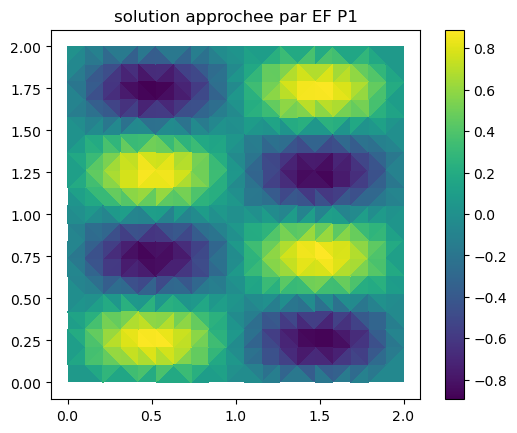

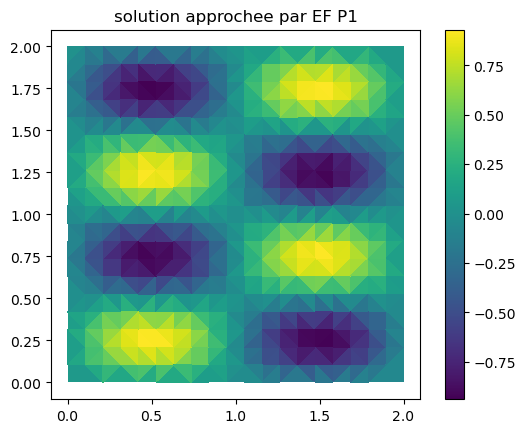

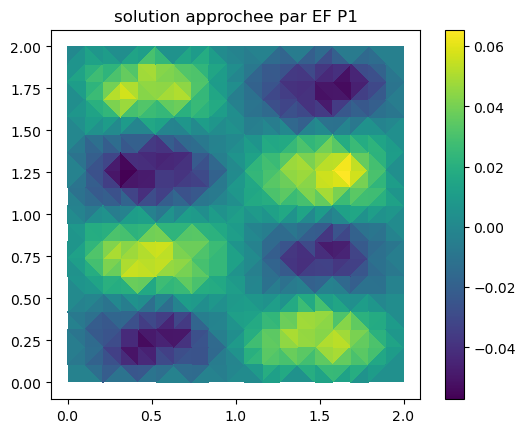

In [9]:
F = np.zeros([NSom,1])

def f(x,y):
    return (5*np.pi**2)*np.sin(np.pi*x)*np.sin(2*np.pi*y)

def uex(x,y):
    return np.sin(np.pi*x)*np.sin(2*np.pi*y)
 
ff=f(TabSom[:,0],TabSom[:,1])
   
F=np.dot(M,ff)

#A=M+K
A=K

for i in range(NSom):
    if RefSom[i,0]==1:
        F[i]=0
        A[i,:]=0
        A[:,i]=0
        A[i,i]=1
        
u=np.linalg.solve(A,F)
ue=uex(TabSom[:,0],TabSom[:,1])

plt.figure(2)
plt.gca().set_aspect('equal')
#plt.tripcolor(triang, U, shading='flat')
plt.tripcolor(triang.x,triang.y,triang.triangles, u, shading='flat')
plt.colorbar()
plt.title('solution approchee par EF P1')

plt.figure(3)
plt.gca().set_aspect('equal')
#plt.tripcolor(triang, U, shading='flat')
plt.tripcolor(triang.x,triang.y,triang.triangles, ue, shading='flat')
plt.colorbar()
plt.title('solution approchee par EF P1')

plt.figure(4)
plt.gca().set_aspect('equal')
#plt.tripcolor(triang, U, shading='flat')
plt.tripcolor(triang.x,triang.y,triang.triangles, u-ue, shading='flat')
plt.colorbar()
plt.title('solution approchee par EF P1')

plt.show()


# pour réprensenter la solution u

#plt.figure(2)
#plt.gca().set_aspect('equal')
#plt.tripcolor(triang.x,triang.y,triang.triangles, u, shading='flat')
#plt.colorbar()
#plt.title('solution approchee par EF P1')

**Question 7.** Soit $\Pi_h u=\displaystyle{\sum_{I=1}^{NSom} u(S_I)\Phi_I}$ l'interpolé P1 de la solution exacte $u$ de $(PN)$ aux points $S_I.$ Calculer, pour différentes valeurs de $h,$ les normes $L^2$ et $H^1$ de l'erreur $u_h-\Pi_h u.$ Remarquer que ces normes peuvent se calculer en utilisant les matrice de masse et de rigidité $M$ et $K$. Représenter, en échèlle logarithmique-logarithmique, ces erreurs en fonction de $h$.

**D'autres structures de maillage**

Vous pouvez remplacer le debut de votre programme par le code ci-dessus, pour générer un maillage non structuré du carré...

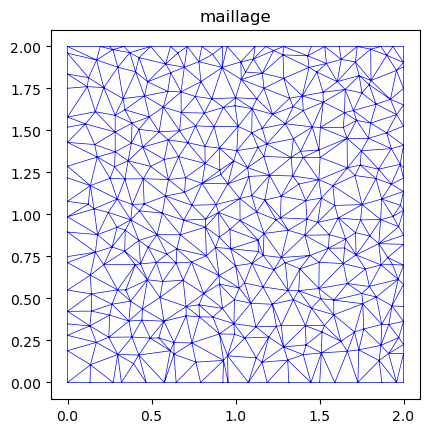

In [10]:
Nx=18
Ny=18

x_m=0.
x_M=2.
y_m=0.
y_M=2.

Rx=rd.random([Nx+2,Nx+2])
Rx[:,0]=0
Rx[:,-1]=0
Ry=rd.random([Ny+2,Ny+2])
Ry[0,:]=0
Ry[-1,:]=0
x=np.linspace(x_m,x_M,Nx+2)#+4*((x_M-x_m)/(5*(Nx+2)))*Rx
y=np.linspace(y_m,y_M,Ny+2)#+4*((y_M-y_m)/(5*(Ny+2)))*Ry

X,Y=np.meshgrid(x,y)
X=X+0.9*((x_M-x_m)/((Nx+2)))*Rx
Y=Y+0.9*((y_M-y_m)/((Ny+2)))*Ry

X=X.flatten()
Y=Y.flatten()

triang = tri.Triangulation(X, Y)

NTri=np.shape(triang.triangles)[0]
NSom=np.shape(triang.x)[0]

#Tableau avec coordonnes des noeuds
TabSom=np.zeros([NSom,2])
TabSom[:,0]=triang.x
TabSom[:,1]=triang.y

# Tableau avec noeuds des triangles
TabTri=triang.triangles

plt.figure(1)
plt.gca().set_aspect('equal')
plt.triplot(X,Y,triang.triangles, 'b-', lw=0.5)
plt.title('maillage')

plt.show()


## II - Conditions aux limites de Dirichlet

On s'intéresse maintenant à la résolution approchée du problème aux limites suivant pour l'équation de Poisson, cette fois-ci avec conditions aux limites de Dirichlet homogène :

$$
(P)\left\{\begin{aligned}
& -\Delta u+u=f,\ \textrm{dans }\Omega,\\
& u=0, \textrm{dans }\partial\Omega
\end{aligned}
\right.
$$
où $f:\overline{\Omega}\longrightarrow\mathbb{R}$ est une fonction de classe $\mathcal{C}^2$ donnée et où $\Omega$ est un ouvert de $\mathbb{R}^2$ donné. 

**Question 1.** Écrire la formulation variationnelle du problème $(P)$ sous la forme 
\begin{equation*}
(Pv)\ \ \ 
\begin{cases}
u\in V  \,\textrm{tel que}\\
a(v,u)=L(v),\ \,\forall\ v\in V ,
\end{cases}
\end{equation*}
où $V=H^1_0(\Omega)$, $a$ est une forme bilinéaire dans $V$  et $L$ une forme linéaire de $V,$ que l'on explicitera. 

Comme dans le cas du problème de Neumann, on considère une triangulation $T_h$ du domaine $\Omega$ et on considère $V_h$ l'approximation de $H^1(\Omega)$ par des éléments finis $P^1$ associés à la triangulation $T_h,$ introduite lors de l'étude du problème de Neumann.  

On note $\{T_N\}_{N=1,\dots,Ntri}\ \ \ $ les triangles de $T_h,$ $\{S_I\}_{I=1,\dots,NSom}\  \ \ $ les sommets des triangles la triangulation et $\{\Phi_I\}_{I=1,\dots,NSom}\ \ \ $ les fonctions de la base de $V_h$ définies par $\Phi_I(S_J)=\delta_{IJ},\ I,J=1,\dots,NSom.$ 

L'espace $V_h^0$ que l'on considèrera pour approcher $H^1_0$ sera constitué des éléments $\Phi_I$ de la base de $V_h$ tels que $I$ n'est pas un sommet appartenant au bord $\partial \Omega$ de $\Omega$. Pour cela, il faut tout d'abord référencer les sommets $I$ qui sont dans le bord. 

**Question 2.** Compléter le code générateur du maillage de $\Omega$ donné à la partie I, qui génère le maillage et les tableaux $TabTri,$ contenant la liste des triangles, et $TabSom,$ contenant les coordonnées de chaque sommet de la triangulation, pour créer un tableau $RefSom$, de taille $NSom\times 1$, que dans chaque ligne $I$ prendra la valeur $1$ si le sommet $I$ appartient à $\partial\Omega$, et $0$ sinon.

On note 

$$
S_0=\big\{I\in \{1,\dots,NSom\}\ \,:\ \,S_I\notin\partial\Omega\big\}
$$

l'ensemble contenant les sommets de la triangulation appartenant à l'intérieur de $\Omega$. 

On définit alors

$$
V_h^0=Vect\big(\{\Phi_I\ \,:\ \,I\in S_0\}\big).
$$

Le problème discret consiste alors à chercher $u_h\in V_h^0$ tel que 
$$
(P_h)\ \ \ \ \ \ \ \ \ a(\Phi_I,u_h)=L(\Phi_I),\ \,\forall\ I\in S_0. 
$$

Ces équations originent un système matricielle à résoudre $AU=F$, avec $A_{IJ}=a(\Phi_J,\Phi_I),\ F_I=L(\Phi_I),$ pour $I,\ J\in S_0$. Il s'agit d'un système analogue à celui de la discrétisation du problème de Neumann, mais dont la matrice  est de taille égale au cardinal de $S_0$, au lieu de taille $NSom$. 

En pratique on ne construit pas cette matrice de taille plus petite. On va construire une matrice de taille $NSom$, contenant les termes $A_{IJ}=a(\Phi_J,\Phi_I)$ correspondant aux sommets du bord $\partial \Omega$, mais on va la modifier dans les lignes et colonnes correspondant à ces noeuds. On fait le même pour le vecteur $F$. On obtient un système matricielle de taille $NSom$ et on le modifie de sort à ce que, si $I\notin S_0$, l'équation $I$ de ce système soit la condition de Dirichlet 

$$
U_I=0.
$$

Pour ce faire, on modifie la valeur de $F_I$ en la mettant à 0, et on modifie les ligne et colonne $I$ de $A$ en mettant tous ses coefficients à $0$, à l'exception du coefficient $A_{II}$ que l'on met par exemple égal à $1$. 

Cette méthode est connue sous le nom de *pseudo-élimination*.

**Question 3.** Construire un programme qui donne la solution approchée du problème $(P_h)$. 

**Question 3 bis - Calcul des matrices élémentaires par passage à un triangle de référence.** Il est parfois plus simple de calculer les intégrales sur un triangle $T$ de sommets $S_{I_1},\ S_{I_2}$ et $S_{I_3}$ en effectuant un changement de variables ramenant au calcul d'un intégrale dans un triangle dite de référence, qui est ici le triangle $T^0$ de sommets $S^0_1=(0,0),\ S^0_2=(1,0)$ et $S^0_3=(0,1)$. Pour faire cela il faut :

* Déterminer la transformation affine $\varphi_T:\RR^2\longrightarrow\RR^2$, de la forme $\varphi_T(x,y)=B\,\cdot\,(x,y)^T+b$, avec $B\in\mathcal{M}_2(\RR)$ et $b=(b_1,b_2)^T\in\RR^2$, tel que $\varphi_T(T^0)=T$ ;

* Écrire le changement de variables 

$$
\int_T\lambda_i\lambda_j=\int_{\varphi_T(T^0)}\lambda_i\lambda_j=\int_{T^0}\lambda_i(\varphi_T(x,y))\lambda_j(\varphi_T(x,y))|\det(B)|dx\,dy=\int_{T^0}\lambda_i^0(x,y)\lambda_j^0(x,y) |\det(B)|dx\,dy,
$$

où $\lambda_1^0(x,y)=1-x-y,\ \lambda_2^0(x,y)=x$ et $\lambda_3^0(x,y)=y$ sont les fonctions de base locales dans le triangle de référence $T_0$, et

$$
\int_T\nabla\lambda_i\cdot\nabla\lambda_j=\int_{T^0}(\nabla\lambda_i)(\varphi_T(x,y))\cdot(\nabla\lambda_j)(\varphi_T(x,y))|\det(B)|dx\,dy=\int_{T^0}(B^T)^{-1}\nabla\lambda_i^0(x,y)\cdot(B^T)^{-1}\nabla\lambda_j^0(x,y) |\det(B)|dx\,dy.
$$


**Question 4.** On considère $f$ tel que la fonction
$$
u(x,y)=\sin(\pi x)\sin(2\pi y)
$$
est solution du problème (P) dans $\Omega=[0,2]\times[0,2].$ 

Calculer la solution approchée donnée par la méthode des éléments finis et représenter graphiquement la solution exacte et la solution approchée. Représenter dans une autre figure la différence, en valeur absolue, entre les deux solutions. Diminuer le pas de la discrétisation et refaire l'exercice.


## III (pour aller plus loin) - Conditions aux limites de Robin

Réfléchir dans cette partie comment adapter la méthode à un problème aux limites avec conditions aux limites de Robin  :

$$
(\tilde{P})\left\{\begin{aligned}
&-\Delta u+u=f,\ \textrm{dans }\Omega,\\
&\frac{\partial u}{\partial n}+pu=g, \textrm{dans }\partial\Omega,
\end{aligned}
\right.
$$

où $p>0$ et $g$ une fonction continue sur $\partial\Omega$ donné.

Pour cela :

- Écrire la formulation variationelle de ce problème ;

- Écrire le problème discret associé à une discrétisation par éléments finis $P_1$ du domaine $\Omega$ et le système linéaire correspondant. Celui-ci fait intervenir une nouvelle matrice de masse surfacique.

- Réfléchir à comment faire pour assembler cette nouvelle matrice, à l'image de ce qu'on fait pour les matrices de masse et de rigidité.

Il faut pour cela accéder au tableau `triang.edges` qui donne dans chaque ligne les sommets des arêtes des triangles composant la triangulation, et créer un tableau qui référence les arêtes qui font partie du bord $\partial \Omega$.

Il faut ensuite, à l'image de ce que l'on a fait pour assembler la matrice $A$, créer une matrice de masse de surface élémentaire pour construire la matrice correspondant aux termes de bord dans la formulation variationelle. 

